In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [10]:
df = pd.read_csv('supermarket.csv')

In [11]:
df.head(3)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,20071019,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,20080328,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
2,200716,20070612,3,9,1,0.86,PRD0900963,CL00248,DEP00089,G00030,...,NaN,NaN,994106200026009,S,MM,Small Shop,Grocery,STORE00001,LS,E02


In [12]:
# df['SHOP_DATE'] = df['SHOP_DATE'].astype(str)

# df['SHOP_DATE'] = df['SHOP_DATE'].astype(str)
# df['shop_year'] = df['SHOP_DATE'].str[:4].astype(int)
# df['shop_month'] = df['SHOP_DATE'].str[4:6].astype(int)
# df['shop_day'] = df['SHOP_DATE'].str[4:6].astype(int)
# df['SHOP_DATE'] = df['SHOP_DATE'].astype(int)
# df.head()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 578082 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SHOP_WEEK                 578082 non-null  int64  
 1   SHOP_DATE                 578082 non-null  int64  
 2   SHOP_WEEKDAY              578082 non-null  int64  
 3   SHOP_HOUR                 578082 non-null  int64  
 4   QUANTITY                  578082 non-null  int64  
 5   SPEND                     578082 non-null  float64
 6   PROD_CODE                 578082 non-null  object 
 7   PROD_CODE_10              578082 non-null  object 
 8   PROD_CODE_20              578082 non-null  object 
 9   PROD_CODE_30              578082 non-null  object 
 10  PROD_CODE_40              578082 non-null  object 
 11  CUST_CODE                 492494 non-null  object 
 12  CUST_PRICE_SENSITIVITY    492494 non-null  object 
 13  CUST_LIFESTAGE            433142 non-null  o

In [14]:
maxdate = df['SHOP_DATE'].max()
print(maxdate)

20080706


In [15]:
start_date = pd.to_datetime('2007-07-06', format='%Y-%m-%d')  # Convert start date to datetime64[ns]

df.dropna(subset=['CUST_CODE'], inplace=True)  # Drop rows with missing values in 'CUST_CODE'
df['SHOP_DATE'] = pd.to_datetime(df['SHOP_DATE'], format='%Y%m%d')  # Convert 'SHOP_DATE' to datetime format

df = df.loc[df['SHOP_DATE'] >= start_date]  # Filter rows based on the start date
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225903 entries, 0 to 578081
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SHOP_WEEK                 225903 non-null  int64         
 1   SHOP_DATE                 225903 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              225903 non-null  int64         
 3   SHOP_HOUR                 225903 non-null  int64         
 4   QUANTITY                  225903 non-null  int64         
 5   SPEND                     225903 non-null  float64       
 6   PROD_CODE                 225903 non-null  object        
 7   PROD_CODE_10              225903 non-null  object        
 8   PROD_CODE_20              225903 non-null  object        
 9   PROD_CODE_30              225903 non-null  object        
 10  PROD_CODE_40              225903 non-null  object        
 11  CUST_CODE                 225903 non-null  object        
 12  CU

In [16]:
df.head(3)

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,...,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200734,2007-10-19,6,8,1,9.50,PRD0901335,CL00058,DEP00016,G00006,...,XX,OT,994108000679877,M,MM,Small Shop,Fresh,STORE00001,LS,E02
1,200805,2008-03-28,6,21,1,1.49,PRD0901120,CL00162,DEP00055,G00016,...,XX,NaN,994110300629787,S,MM,Small Shop,Fresh,STORE00001,LS,E02
1115,200815,2008-06-05,5,15,1,0.70,PRD0904509,CL00093,DEP00028,G00008,...,LA,OF,994111300258138,L,LA,Top Up,Grocery,STORE00001,LS,E02


In [17]:
df_bkt_unique = df.drop_duplicates(subset=['CUST_CODE', 'BASKET_ID'])
df_bkt_unique.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30189 entries, 0 to 578057
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SHOP_WEEK                 30189 non-null  int64         
 1   SHOP_DATE                 30189 non-null  datetime64[ns]
 2   SHOP_WEEKDAY              30189 non-null  int64         
 3   SHOP_HOUR                 30189 non-null  int64         
 4   QUANTITY                  30189 non-null  int64         
 5   SPEND                     30189 non-null  float64       
 6   PROD_CODE                 30189 non-null  object        
 7   PROD_CODE_10              30189 non-null  object        
 8   PROD_CODE_20              30189 non-null  object        
 9   PROD_CODE_30              30189 non-null  object        
 10  PROD_CODE_40              30189 non-null  object        
 11  CUST_CODE                 30189 non-null  object        
 12  CUST_PRICE_SENSIT

In [18]:
def create_proportion(df, col):
    # Group by ID and count unique strings
    grouped = df.groupby('CUST_CODE')[col].value_counts().unstack(fill_value=0)

    # Calculate total string counts for each ID
    grouped['Total'] = grouped.sum(axis=1)

    # Calculate proportion columns
    unique_strings = grouped.columns[:-1]
    proportion_columns = [f'{col}_{string}' for string in unique_strings]
    grouped[proportion_columns] = grouped[unique_strings].div(grouped['Total'], axis=0)

    # Reset the index if desired
    grouped.reset_index(inplace=True)

    # Select only the 'ID' column and proportion columns
    result = grouped[['CUST_CODE'] + proportion_columns]

    return result

In [19]:
df_bkt_type = create_proportion(df_bkt_unique, 'BASKET_TYPE')
df_bkt_type.head(3)

BASKET_TYPE,CUST_CODE,BASKET_TYPE_Full Shop,BASKET_TYPE_Small Shop,BASKET_TYPE_Top Up,BASKET_TYPE_XX
0,CUST0000000689,0.437500,0.312500,0.250000,0.0
1,CUST0000001163,0.000000,1.000000,0.000000,0.0
2,CUST0000001194,0.418182,0.145455,0.436364,0.0


In [20]:
df_bkt_dom = create_proportion(df_bkt_unique, 'BASKET_DOMINANT_MISSION')
df_bkt_dom.head(3)

BASKET_DOMINANT_MISSION,CUST_CODE,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood,BASKET_DOMINANT_MISSION_XX
0,CUST0000000689,0.312500,0.187500,0.437500,0.062500,0.0
1,CUST0000001163,1.000000,0.000000,0.000000,0.000000,0.0
2,CUST0000001194,0.654545,0.109091,0.218182,0.018182,0.0


In [21]:
df_bkt_sen = create_proportion(df_bkt_unique, 'BASKET_PRICE_SENSITIVITY')
df_bkt_sen.head(3)

BASKET_PRICE_SENSITIVITY,CUST_CODE,BASKET_PRICE_SENSITIVITY_LA,BASKET_PRICE_SENSITIVITY_MM,BASKET_PRICE_SENSITIVITY_UM,BASKET_PRICE_SENSITIVITY_XX
0,CUST0000000689,0.375000,0.625000,0.000000,0.0
1,CUST0000001163,0.000000,1.000000,0.000000,0.0
2,CUST0000001194,0.018182,0.654545,0.327273,0.0


In [22]:
df_bkt_size = df.groupby(['CUST_CODE', 'BASKET_ID'])[['SPEND']].sum().groupby('CUST_CODE').agg(bkt_size=('SPEND', 'mean')).reset_index()
df_bkt_size.head(3)

,CUST_CODE,bkt_size
0,CUST0000000689,20.535625
1,CUST0000001163,0.520000
2,CUST0000001194,29.294909


In [23]:
df_idgroup = df.groupby('CUST_CODE')

df_total_spend = df_idgroup.agg(total_spend=('SPEND', 'sum')).reset_index()
df_total_spend.head(3)

,CUST_CODE,total_spend
0,CUST0000000689,328.57
1,CUST0000001163,0.52
2,CUST0000001194,1611.22


In [24]:
df_bkt_count = df_idgroup.agg(bkt_count=('BASKET_ID', 'nunique')).reset_index()
df_bkt_count.head(3)

,CUST_CODE,bkt_count
0,CUST0000000689,16
1,CUST0000001163,1
2,CUST0000001194,55


In [39]:
maxdate = df['SHOP_DATE'].max()
df_recency = df_idgroup.agg(recency=('SHOP_DATE', 'max')).reset_index()
df_recency['recency'] = maxdate - df_recency['recency']
df_recency['recency'] = df_recency['recency'].dt.days.astype(int)
df_recency.head(3)

,CUST_CODE,recency
0,CUST0000000689,13
1,CUST0000001163,14
2,CUST0000001194,16


In [40]:
df_scv = pd.merge(df_total_spend, df_bkt_count, on='CUST_CODE')
df_scv = pd.merge(df_scv, df_bkt_type, on='CUST_CODE')
df_scv = pd.merge(df_scv, df_bkt_dom, on='CUST_CODE')
df_scv = pd.merge(df_scv, df_bkt_sen, on='CUST_CODE')
df_scv = pd.merge(df_scv, df_recency, on='CUST_CODE')
df_scv = pd.merge(df_scv, df_bkt_size, on='CUST_CODE')

df_scv.head(3)

,CUST_CODE,total_spend,bkt_count,BASKET_TYPE_Full Shop,BASKET_TYPE_Small Shop,BASKET_TYPE_Top Up,BASKET_TYPE_XX,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood,BASKET_DOMINANT_MISSION_XX,BASKET_PRICE_SENSITIVITY_LA,BASKET_PRICE_SENSITIVITY_MM,BASKET_PRICE_SENSITIVITY_UM,BASKET_PRICE_SENSITIVITY_XX,recency,bkt_size
0,CUST0000000689,328.57,16,0.437500,0.312500,0.250000,0.0,0.312500,0.187500,0.437500,0.062500,0.0,0.375000,0.625000,0.000000,0.0,13,20.535625
1,CUST0000001163,0.52,1,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,14,0.520000
2,CUST0000001194,1611.22,55,0.418182,0.145455,0.436364,0.0,0.654545,0.109091,0.218182,0.018182,0.0,0.018182,0.654545,0.327273,0.0,16,29.294909


In [41]:
X = df_scv.drop(columns='CUST_CODE')

In [42]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[8.70032650e-02, 5.10204082e-02, 4.37500000e-01, ...,
        0.00000000e+00, 3.55191257e-02, 6.68674257e-02],
       [1.35048896e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.82513661e-02, 1.66145426e-03],
       [4.26651238e-01, 1.83673469e-01, 4.18181818e-01, ...,
        0.00000000e+00, 4.37158470e-02, 9.54030137e-02],
       ...,
       [4.07847665e-02, 3.40136054e-02, 2.72727273e-01, ...,
        0.00000000e+00, 2.59562842e-01, 4.55848556e-02],
       [2.30165686e-02, 2.04081633e-02, 1.42857143e-01, ...,
        1.42857143e-01, 8.46994536e-02, 4.04240664e-02],
       [7.65277075e-04, 3.40136054e-03, 0.00000000e+00, ...,
        0.00000000e+00, 2.18579235e-01, 4.69116497e-03]])

In [43]:
# k_values = range(1, 10)
# inertia_values = []
# for k in k_values:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(X)
#     inertia_values.append(kmeans.inertia_)

# # Plot the inertia values
# plt.plot(k_values, inertia_values, marker='o')
# plt.xlabel('Number of clusters (k)')
# plt.ylabel('Sum of squared distances')
# plt.title('Elbow Method')
# plt.show()

In [76]:
for k in range(2, 6):
    # Create a KMeans object and fit the data
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)

    # Get the cluster labels for each sample
    labels = kmeans.labels_

    # Calculate silhouette score
    silhouette_avg = silhouette_score(X, labels)

    # Print the silhouette score
    print(f"Silhouette Score k={k} : {silhouette_avg}")

Silhouette Score k=2 : 0.19590630722655172
Silhouette Score k=3 : 0.18452133722509934
Silhouette Score k=4 : 0.18657882212798976
Silhouette Score k=5 : 0.18543998387672295


In [86]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Get cluster labels and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Add cluster labels to the DataFrame
df_scv['Cluster'] = labels
df_scv.head(3)

,CUST_CODE,total_spend,bkt_count,BASKET_TYPE_Full Shop,BASKET_TYPE_Small Shop,BASKET_TYPE_Top Up,BASKET_TYPE_XX,BASKET_DOMINANT_MISSION_Fresh,BASKET_DOMINANT_MISSION_Grocery,BASKET_DOMINANT_MISSION_Mixed,BASKET_DOMINANT_MISSION_Nonfood,BASKET_DOMINANT_MISSION_XX,BASKET_PRICE_SENSITIVITY_LA,BASKET_PRICE_SENSITIVITY_MM,BASKET_PRICE_SENSITIVITY_UM,BASKET_PRICE_SENSITIVITY_XX,recency,bkt_size,Cluster
0,CUST0000000689,328.57,16,0.437500,0.312500,0.250000,0.0,0.312500,0.187500,0.437500,0.062500,0.0,0.375000,0.625000,0.000000,0.0,13,20.535625,0
1,CUST0000001163,0.52,1,0.000000,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.0,14,0.520000,2
2,CUST0000001194,1611.22,55,0.418182,0.145455,0.436364,0.0,0.654545,0.109091,0.218182,0.018182,0.0,0.018182,0.654545,0.327273,0.0,16,29.294909,0


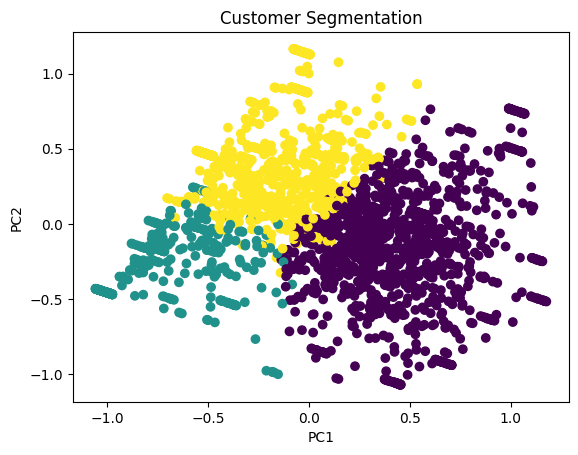

In [87]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Customer Segmentation')

# plt.legend(handles=scatter.legend_elements()[0], labels=set(labels), title='Labels')

# Show the plot
plt.show()

In [52]:
def des_clus(cluster):
    print(df_scv.loc[df_scv['Cluster']==cluster, ['total_spend', 'bkt_size', 'bkt_count', 'recency']].mean())

In [88]:
des_clus(0)
des_clus(1)
des_clus(2)

total_spend    305.535072
bkt_size        22.598271
bkt_count       15.728728
recency         83.603201
dtype: float64
total_spend     17.368772
bkt_size         4.533789
bkt_count        3.543860
recency        129.990253
dtype: float64
total_spend     79.194598
bkt_size         5.790858
bkt_count       11.645858
recency        108.771909
dtype: float64


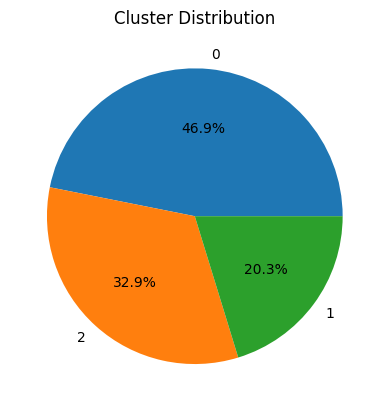

In [89]:
cluster_counts = df_scv['Cluster'].value_counts()

# Create a pie chart
plt.pie(cluster_counts, labels=cluster_counts.index, autopct='%1.1f%%')

# Add a title to the chart
plt.title('Cluster Distribution')

# Display the chart
plt.show()

In [100]:
def pd_rec(cluster): # product recomend by cluster
  c = df[df['CUST_CODE'].isin(df_scv.loc[df_scv['Cluster']==cluster]['CUST_CODE'])]
  basket = c.groupby(['BASKET_ID', 'PROD_CODE_20'])['QUANTITY'].sum().unstack().reset_index().fillna(0).set_index('BASKET_ID')
  def encode_units(x):
      if x <= 0:
          return 0
      if x >= 1:
          return 1
  basket_encode = basket.applymap(encode_units)

  basket_filter = basket_encode[(basket_encode > 0).sum(axis=1)>=2]

  frequent_itemsets = apriori(basket_filter, min_support=0.05, use_colnames=True).sort_values('support', ascending=False).reset_index(drop=True)
  frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

  display(association_rules(frequent_itemsets, metric='lift', min_threshold=1).sort_values('lift', ascending=False).reset_index(drop=True))

In [101]:
pd_rec(0)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(DEP00011, DEP00067)","(DEP00008, DEP00046)",0.190336,0.126667,0.053945,0.283419,2.237519,0.029836,1.218750,0.683094
1,"(DEP00008, DEP00046)","(DEP00011, DEP00067)",0.126667,0.190336,0.053945,0.425881,2.237519,0.029836,1.410272,0.633294
2,"(DEP00053, DEP00011)","(DEP00008, DEP00021)",0.129052,0.190336,0.052416,0.406161,2.133912,0.027853,1.363440,0.610114
3,"(DEP00008, DEP00021)","(DEP00053, DEP00011)",0.190336,0.129052,0.052416,0.275386,2.133912,0.027853,1.201947,0.656294
4,"(DEP00008, DEP00067)","(DEP00049, DEP00011)",0.216086,0.115535,0.052232,0.241721,2.092185,0.027267,1.166411,0.665928
...,...,...,...,...,...,...,...,...,...,...
2887,(DEP00019),(DEP00055),0.557676,0.187156,0.107339,0.192476,1.028428,0.002967,1.006589,0.062493
2888,(DEP00008),(DEP00005),0.489664,0.134006,0.066544,0.135898,1.014118,0.000926,1.002190,0.027280
2889,(DEP00005),(DEP00008),0.134006,0.489664,0.066544,0.496577,1.014118,0.000926,1.013733,0.016076
2890,(DEP00076),(DEP00054),0.258104,0.222385,0.057492,0.222749,1.001635,0.000094,1.000468,0.002200


In [102]:
pd_rec(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DEP00019),(DEP00067),0.240113,0.110169,0.052260,0.217647,1.975566,0.025807,1.137377,0.649854
1,(DEP00067),(DEP00019),0.110169,0.240113,0.052260,0.474359,1.975566,0.025807,1.445639,0.554955
2,(DEP00052),(DEP00054),0.351695,0.162429,0.072034,0.204819,1.260974,0.014908,1.053309,0.319236
3,(DEP00054),(DEP00052),0.162429,0.351695,0.072034,0.443478,1.260974,0.014908,1.164923,0.247099
4,(DEP00055),(DEP00054),0.285311,0.162429,0.056497,0.198020,1.219113,0.010154,1.044378,0.251482
5,(DEP00054),(DEP00055),0.162429,0.285311,0.056497,0.347826,1.219113,0.010154,1.095857,0.214587
6,(DEP00022),(DEP00052),0.175141,0.351695,0.067797,0.387097,1.100661,0.006200,1.057761,0.110873
7,(DEP00052),(DEP00022),0.351695,0.175141,0.067797,0.192771,1.100661,0.006200,1.021840,0.141068
8,(DEP00052),(DEP00055),0.351695,0.285311,0.110169,0.313253,1.097936,0.009827,1.040688,0.137590
9,(DEP00055),(DEP00052),0.285311,0.351695,0.110169,0.386139,1.097936,0.009827,1.056110,0.124810


In [103]:
pd_rec(2)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(DEP00011),"(DEP00008, DEP00019)",0.254517,0.116448,0.050656,0.199029,1.709169,0.021018,1.103101,0.556580
1,"(DEP00008, DEP00019)",(DEP00011),0.116448,0.254517,0.050656,0.435013,1.709169,0.021018,1.319469,0.469605
2,(DEP00020),(DEP00008),0.140077,0.272432,0.062085,0.443219,1.626897,0.023923,1.306740,0.448102
3,(DEP00008),(DEP00020),0.272432,0.140077,0.062085,0.227891,1.626897,0.023923,1.113733,0.529618
4,(DEP00008),"(DEP00019, DEP00011)",0.272432,0.114903,0.050656,0.185941,1.618237,0.019353,1.087263,0.525097
5,"(DEP00019, DEP00011)",(DEP00008),0.114903,0.272432,0.050656,0.440860,1.618237,0.019353,1.301227,0.431641
6,(DEP00008),(DEP00011),0.272432,0.254517,0.105946,0.388889,1.527946,0.036607,1.219881,0.474907
7,(DEP00011),(DEP00008),0.254517,0.272432,0.105946,0.416262,1.527946,0.036607,1.246394,0.463494
8,(DEP00021),(DEP00011),0.151351,0.254517,0.058533,0.386735,1.519482,0.020011,1.215596,0.402854
9,(DEP00011),(DEP00021),0.254517,0.151351,0.058533,0.229976,1.519482,0.020011,1.102106,0.458604
